In [2]:
import mesaPlot as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
#We start by defining our home folder.
#Define the home folder to where your LOGS file is from the MESA Program.
home = "C:\\Users\\kayah\\OneDrive\\Desktop\\Astronomy and Astrophysics\\Semester 1\\Period 2\\Stellar Structure and Evolution\\MESA\\Project\\Question 1"

#Now we define a function to set up the LOGS file location.
def file_loc(ext):
    '''Finds the location of the data files from the home folder returns 
    the history.data file.

    Input:
        ext: 
            str folder where history.data file is located
        
        variables:
            file_loc: str file path
            data.loadHistory: list load the data form file_loc

    Return: 
        data
        
    '''
    
    #Adding the "ext" to our path.
    #Example: If ext is LOGS we get into the LOGS file.
    file_loc = home + "//" + ext
    
    #We set up our data using the MesaPlot Library.
    data = mp.MESA()
    
    #We use the LOGS file of our data from MESA program.
    data.loadHistory(f = file_loc)
    
    return data

#We get the data from the LOGS file we will use.
#Writing data folders name.
data_logs = 'LOGS'

#Using the function to get the data.
data = file_loc(data_logs)

#We extract the data, get the columns/data we want from the LOGS file using
#pandas library.
def get_data(datafile):
    #We first write the columns we want to use from the LOGS file.
    wanted_columns = ["log_cntr_T", "log_cntr_Rho"]
    
    #Then we put them into a numpy array.
    wanted_data = np.array([datafile.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
    
    #Finally, we create our DataFrame using pandas.
    df_star = pd.DataFrame(wanted_data, columns = wanted_columns)
    
    #We get our datasets.
    T = df_star["log_cntr_T"]
    Rho = df_star["log_cntr_Rho"]
    
    return T, Rho

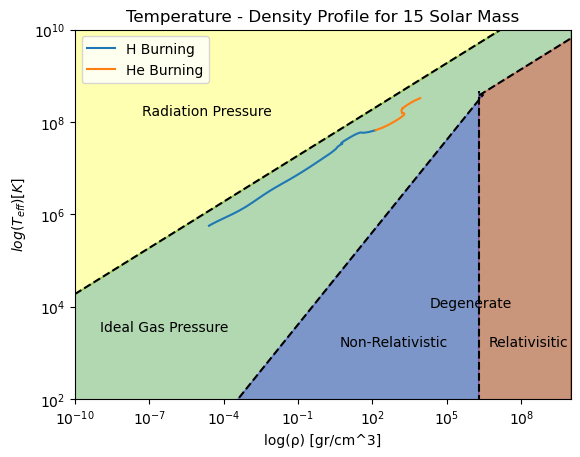

In [5]:
#We get the data from our defined function.
T, Rho = get_data(data)

#We first turn the T and Rho values into linspace since we will find the
#boundaries in linearspace as well.
#Afterwards, we will plot everything in Logspace!
T = 10 ** T
Rho = 10 ** Rho

#We also define Temperature and Rho arrays for the boundaries, seperate from
#the Star Data we have.
T_boundary = np.linspace(1e-3, 1e10, 10000)
Rho_boundary = np.linspace(1e-10, 1e10, 10000)

#We create our figure.
plt.figure()

#------------------------------------------------------------------------------

#We need to find where H abundance is zero since thats where the He burning
#starts.
#For this, we take Center H Mass and Center He Mass from the LOGS data we have.
wanted_columns = ["center_h1", "center_he4"]    
wanted_data = np.array([data.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
df_star = pd.DataFrame(wanted_data, columns = wanted_columns)

H_mass = df_star["center_h1"]
He_mass = df_star["center_he4"]

#We find the index where the Hydrogen hits zero, so where the He burning starts.
index_He_burning = np.where(H_mass == 0.0)

#Now we find the first index of this array.
index = index_He_burning[0][0]

#Now we separate T and Rho values into two arrays so that we can color them
#differently, representing the H and He burnings.
T_H, Rho_H = T[0:index+1], Rho[0:index+1]
T_He, Rho_He = T[index:], Rho[index:]

#Now we need to separate the arrays into two.
#We plot the parameters we need. (For this question its T_center vs Rho_center)
plt.plot(Rho_H, T_H, label = "H Burning")
plt.plot(Rho_He, T_He, label = "He Burning")

#We add our labels.
plt.xlabel("log(ρ) [gr/cm^3]")
plt.ylabel("$log(T_{eff}) [K]$")
plt.title("Temperature - Density Profile for 15 Solar Mass")

#Since the Temperature values are inverted in the HR Diagram we invert the
#temperature values.
#plt.gca().invert_xaxis()

#Changing the Graph scales to log-log.
#plt.xscale('log')
#plt.yscale('log')

#Plotting the legend.
#plt.legend()

#------------------------------------------------------------------------------

#We need µ and in µ_e order to find the limits for our plot.
#For this, we take µ and µe from the LOGS data we have.
wanted_columns = ["center_mu", "center_ye"]    
wanted_data = np.array([data.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
df_star = pd.DataFrame(wanted_data, columns = wanted_columns)

Mu = df_star["center_mu"]
Mu_e = df_star["center_ye"]

#------------------------------------------------------------------------------

#Now we will find the Boundary Conditions.
#For this, we will calculate everything in linearspace!
#In the end, we will show everything in logspace in our graph!

#We consider that:
    #Mu = 1/2
    #Mu_e = 2

Mu = 1/2
Mu_e = 2

#------------------------------------------------------------------------------

#Boundary of Radiation Pressure and Ideal Gas Pressure 
Boundary_Radiation_Ideal = (3.2e7 * ((Rho_boundary/Mu)**(1/3))) #We basically calculate Temperature
plt.plot(Rho_boundary, Boundary_Radiation_Ideal, "--", color = "black")

#------------------------------------------------------------------------------

#For Boundaries of Ideal Gas Pressure with Relativistic & NonRelativistic
#Electron Pressure, we need to find the Density and Temperature where both
#boundaries intersect one another.

#For this, considering the Temperatures are the same (since they intersect),
#using the Boundary formulas we get the following result for the Density where
#the Boundary lines intersect.
Rho_intersect = (1/((Mu_e**(-1/3))*(8.07e-3)))**3

#Using this and one of the Boundary Formulas, we can also find the Intersect
#Temperature as follows. (We'll use the Ideal Gas & Relativistic Formula)
T_intersect = (1.50e7 * (Rho_intersect ** (1/3)) * (Mu) * (Mu_e ** (-4/3)))

#------------------------------------------------------------------------------

#Now to find the Boundaries:
    #Ideal Gas & Relativistic: Has to go on until Boundary Conditions
    #Ideal Gas & Non-Relativistic: Has to start from Boundary Conditions

#For this, we separate the T_boundary and Rho_boundary datas into two!
T_boundary_NR = T_boundary[T_boundary <= T_intersect]
T_boundary_Rel = T_boundary[T_boundary >= T_intersect]

Rho_boundary_NR = Rho_boundary[Rho_boundary <= Rho_intersect]
Rho_boundary_Rel = Rho_boundary[Rho_boundary >= Rho_intersect]

Rho_boundary_Rel = np.insert(Rho_boundary_Rel, 0, 2.00030003e+06)
T_boundary_Rel = np.insert(T_boundary_Rel, 0, 3.64046405e+08)

#------------------------------------------------------------------------------

#Now we can find the boundaries.

#Boundary of Ideal Gas Pressure and Relativistic Degenerate Electron Pressure
Boundary_Ideal_Rel = (1.50e7 * (Rho_boundary_Rel ** (1/3)) * (Mu) * (Mu_e ** (-4/3)))
plt.plot(Rho_boundary_Rel, Boundary_Ideal_Rel, "--", color = "black")

#Boundary of Ideal Gas Pressure and Non-Relativistic Degenerate Electron Pressure
Boundary_Ideal_NRdegenerate = (1.21e5 * (Rho_boundary_NR ** (2/3)) * (Mu) * (Mu_e ** (-5/3)))
plt.plot(Rho_boundary_NR, Boundary_Ideal_NRdegenerate, "--", color = "black")

#Boundary of Non-Relativistic and Relativistic Degenerate Electron Pressure
Boundary_Rel_NRdegenerate = 9.7e5 * Mu_e #This time we calculate density
Boundary_Rel_NRdegenerate_array = np.full(len(T_boundary_NR), Boundary_Rel_NRdegenerate)
plt.plot(Boundary_Rel_NRdegenerate_array, T_boundary_NR, "--", color = "black")

#------------------------------------------------------------------------------

#We now add the Text & Backgrounds.
plt.text(5e-8, 1.4e8, "Radiation Pressure")
plt.text(1e-9, 3e3, "Ideal Gas Pressure")
plt.text(5e0, 1.4e3, "Non-Relativistic")
plt.text(5e6, 1.4e3, "Relativisitic")
plt.text(2e4, 1e4, "Degenerate")

plt.fill_between(Rho_boundary, 1e11, Boundary_Radiation_Ideal, color='yellow', alpha=0.3)
plt.fill_between(Rho_boundary, Boundary_Radiation_Ideal, color='green', alpha=0.3)
plt.fill_between(Rho_boundary_Rel, Boundary_Ideal_Rel, color='red', alpha=0.3)
plt.fill_betweenx(Boundary_Ideal_NRdegenerate, Rho_boundary_NR, Boundary_Rel_NRdegenerate, color='blue', alpha=0.3)

#We set up the boundaries of our plot
ax = plt.gca() #"get current axes"
ax.set_xlim([1e-10, 1e10])
ax.set_ylim([1e2, 1e10])

#We make the plot a log-log plot
plt.xscale('log')
plt.yscale('log')

#We plot the legend
plt.legend()

plt.savefig("Question 3")

#Showing the plot.
plt.show()

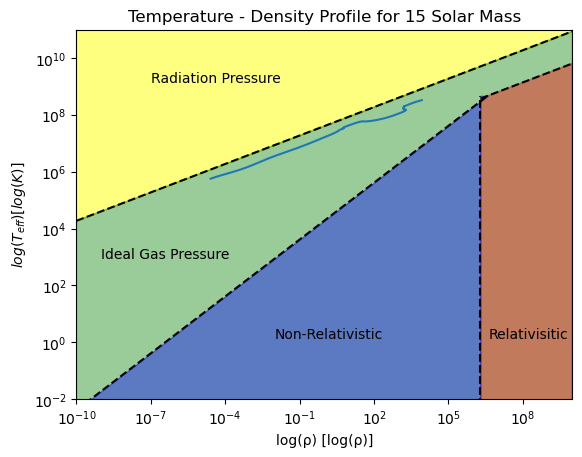

In [6]:
#We get the data from our defined function.
T, Rho = get_data(data)

#We first turn the T and Rho values into linspace since we will find the
#boundaries in linearspace as well.
#Afterwards, we will plot everything in Logspace!
T = 10 ** T
Rho = 10 ** Rho

#We also define Temperature and Rho arrays for the boundaries, seperate from
#the Star Data we have.
T_boundary = np.linspace(1e-3, 1e10, 10000)
Rho_boundary = np.linspace(1e-10, 1e10, 10000)

#We create our figure.
plt.figure()

#We plot the parameters we need. (For this question its T_center vs Rho_center)
plt.plot(Rho, T)

#We add our labels.
plt.xlabel("log(ρ) [log(ρ)]")
plt.ylabel("$log(T_{eff}) [log(K)]$")
plt.title("Temperature - Density Profile for 15 Solar Mass")

#Since the Temperature values are inverted in the HR Diagram we invert the
#temperature values.
#plt.gca().invert_xaxis()

#Changing the Graph scales to log-log.
#plt.xscale('log')
#plt.yscale('log')

#Plotting the legend.
#plt.legend()

#------------------------------------------------------------------------------

#We need µ and in µ_e order to find the limits for our plot.
#For this, we take µ and µe from the LOGS data we have.
wanted_columns = ["center_mu", "center_ye"]    
wanted_data = np.array([data.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
df_star = pd.DataFrame(wanted_data, columns = wanted_columns)

Mu = df_star["center_mu"]
Mu_e = df_star["center_ye"]

#------------------------------------------------------------------------------

#Now we will find the Boundary Conditions.
#For this, we will calculate everything in linearspace!
#In the end, we will show everything in logspace in our graph!

#We consider that:
    #Mu = 1/2
    #Mu_e = 2

Mu = 1/2
Mu_e = 2

#------------------------------------------------------------------------------

#Boundary of Radiation Pressure and Ideal Gas Pressure 
Boundary_Radiation_Ideal = (3.2e7 * ((Rho_boundary/Mu)**(1/3))) #We basically calculate Temperature
plt.plot(Rho_boundary, Boundary_Radiation_Ideal, "--", color = "black")

#------------------------------------------------------------------------------

#For Boundaries of Ideal Gas Pressure with Relativistic & NonRelativistic
#Electron Pressure, we need to find the Density and Temperature where both
#boundaries intersect one another.

#For this, considering the Temperatures are the same (since they intersect),
#using the Boundary formulas we get the following result for the Density where
#the Boundary lines intersect.
Rho_intersect = (1/((Mu_e**(-1/3))*(8.067e-3)))**3

#Using this and one of the Boundary Formulas, we can also find the Intersect
#Temperature as follows. (We'll use the Ideal Gas & Relativistic Formula)
T_intersect = (1.50e7 * (Rho_intersect ** (1/3)) * (Mu) * (Mu_e ** (-4/3)))

#------------------------------------------------------------------------------

#Now to find the Boundaries:
    #Ideal Gas & Relativistic: Has to go on until Boundary Conditions
    #Ideal Gas & Non-Relativistic: Has to start from Boundary Conditions

#For this, we separate the T_boundary and Rho_boundary datas into two!
T_boundary_NR = T_boundary[T_boundary < T_intersect]
T_boundary_Rel = T_boundary[T_boundary >= T_intersect]

Rho_boundary_NR = Rho_boundary[Rho_boundary < Rho_intersect]
Rho_boundary_Rel = Rho_boundary[Rho_boundary >= Rho_intersect]

#We also add intersection Rho and T values to both of the arrays for
#them to intersect exactly at one point.
T_boundary_NR = np.append(T_boundary_NR, T_intersect)
T_boundary_Rel = np.insert(T_boundary_Rel, 0, T_intersect)

Rho_boundary_NR = np.append(Rho_boundary_NR, Rho_intersect)
Rho_boundary_Rel = np.insert(Rho_boundary_Rel, 0, Rho_intersect)

Rho_boundary_Rel = np.insert(Rho_boundary_Rel, 0, 2.00030003e+06)
T_boundary_Rel = np.insert(T_boundary_Rel, 0, 3.64046405e+08)

#------------------------------------------------------------------------------

#Now we can find the boundaries.

#Boundary of Ideal Gas Pressure and Relativistic Degenerate Electron Pressure
Boundary_Ideal_Rel = (1.50e7 * (Rho_boundary_Rel ** (1/3)) * (Mu) * (Mu_e ** (-4/3)))
plt.plot(Rho_boundary_Rel, Boundary_Ideal_Rel, "--", color = "black")

#Boundary of Ideal Gas Pressure and Non-Relativistic Degenerate Electron Pressure
Boundary_Ideal_NRdegenerate = (1.21e5 * (Rho_boundary_NR ** (2/3)) * (Mu) * (Mu_e ** (-5/3)))
plt.plot(Rho_boundary_NR, Boundary_Ideal_NRdegenerate, "--", color = "black")

#Boundary of Non-Relativistic and Relativistic Degenerate Electron Pressure
Boundary_Rel_NRdegenerate = 9.7e5 * Mu_e #This time we calculate density
Boundary_Rel_NRdegenerate_array = np.full(len(T_boundary_NR), Boundary_Rel_NRdegenerate)
plt.plot(Boundary_Rel_NRdegenerate_array, T_boundary_NR, "--", color = "black")

#------------------------------------------------------------------------------

#We now add the Text & Backgrounds.
plt.text(1e-7, 1.4e9, "Radiation Pressure")
plt.text(1e-9, 9e2, "Ideal Gas Pressure")
plt.text(1e-2, 1.4e0, "Non-Relativistic")
plt.text(4e6, 1.4e0, "Relativisitic")

plt.fill_between(Rho_boundary, 1e11, Boundary_Radiation_Ideal, color='yellow', alpha=0.5)
plt.fill_between(Rho_boundary, Boundary_Radiation_Ideal, color='green', alpha=0.4)
plt.fill_between(Rho_boundary_Rel, Boundary_Ideal_Rel, color='red', alpha=0.4)
plt.fill_betweenx(Boundary_Ideal_NRdegenerate, Rho_boundary_NR, Boundary_Rel_NRdegenerate, color='blue', alpha=0.4)

#We set up the boundaries of our plot
ax = plt.gca() #"get current axes"
ax.set_xlim([1e-10, 1e10])
ax.set_ylim([1e-2, 1e11])

#We make the plot a log-log plot
plt.xscale('log')
plt.yscale('log')

#Showing the plot.
plt.show()

In [5]:
#Star Age
#H and He on one plot
#C N O on one plot
#Zoom when He drops, HE C and O

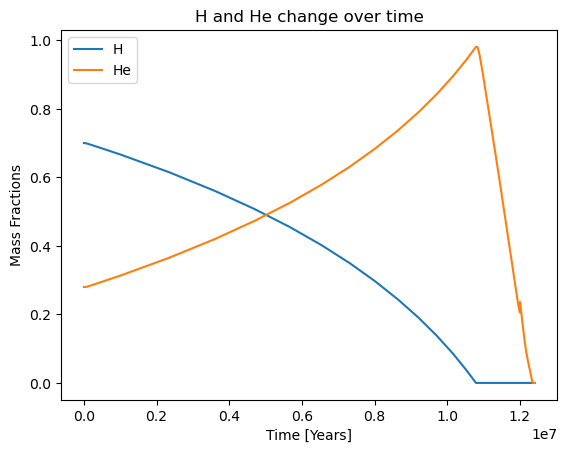

In [7]:
#Plot of H and He
#------------------------------------------------------------------------------
wanted_columns = ["center_h1", "center_he4", "star_age"]    
wanted_data = np.array([data.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
df_star = pd.DataFrame(wanted_data, columns = wanted_columns)

H = df_star["center_h1"]
He = df_star["center_he4"]
Time = df_star["star_age"]

plt.figure()

plt.plot(Time, H, label = "H")
plt.plot(Time, He, label = "He")

#We add our labels.
plt.xlabel("Time [Years]")
plt.ylabel("Mass Fractions")
#plt.xscale("log")
plt.title("H and He change over time")
plt.legend()

plt.savefig("Question 1 (a)")
plt.show()

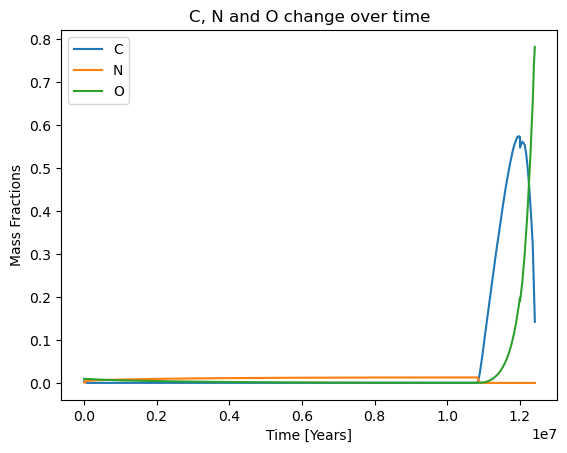

In [8]:
#Plot of C, N and O
#------------------------------------------------------------------------------
wanted_columns = ["center_c12", "center_n14", "center_o16", "star_age"]    
wanted_data = np.array([data.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
df_star = pd.DataFrame(wanted_data, columns = wanted_columns)

C = df_star["center_c12"]
N = df_star["center_n14"]
O = df_star["center_o16"]
Time = df_star["star_age"]

plt.figure()

plt.plot(Time, C, label = "C")
plt.plot(Time, N, label = "N")
plt.plot(Time, O, label = "O")

#We add our labels.
plt.xlabel("Time [Years]")
plt.ylabel("Mass Fractions")
#plt.xscale("log")
plt.title("C, N and O change over time")
plt.legend()
plt.savefig("Question 1 (b)")
plt.show()

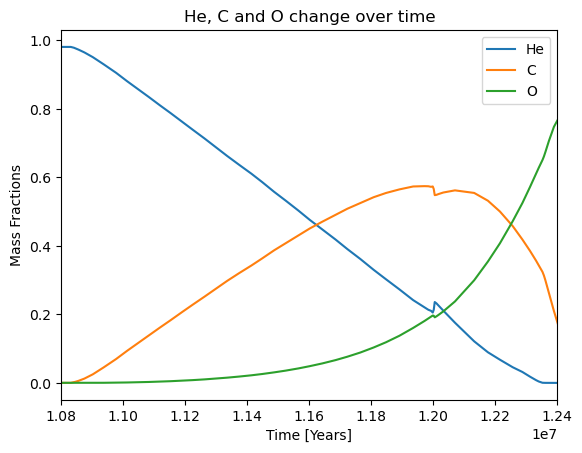

In [9]:
#Plot of He, C and O
#------------------------------------------------------------------------------
wanted_columns = ["center_c12", "center_he4", "center_o16", "star_age"]    
wanted_data = np.array([data.hist[column] for column in wanted_columns]).T # Transpose: rows -> columns
df_star = pd.DataFrame(wanted_data, columns = wanted_columns)

He = df_star["center_he4"]
C = df_star["center_c12"]
O = df_star["center_o16"]

Time = df_star["star_age"]

plt.figure()

plt.plot(Time, He, label="He")
plt.plot(Time, C, label="C")
plt.plot(Time, O, label="O")

ax = plt.gca() #"get current axes"
ax.set_xlim([1.08e7, 1.24e7])

#We add our labels.
plt.xlabel("Time [Years]")
plt.ylabel("Mass Fractions")
#plt.xscale("log")
plt.title("He, C and O change over time")
plt.legend()
plt.savefig("Question 1 (c)")
plt.show()